<a href="https://colab.research.google.com/github/Sopralapanca/ComputationalHealthLab/blob/master/%5BCHL%5DClinicalDataEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
import pandas as pd
import numpy as np

# clone the repository in order to download the dataset
!git clone https://github.com/Sopralapanca/ComputationalHealthLab.git

data_path = "/content/ComputationalHealthLab/datasets/TiroideCardio_dataset.csv"
df = pd.read_csv(data_path)

# Data Understanding & Data Preparation

In [2]:
# removing \n from the name of the columns
columns = df.columns
new_cols = columns.str.replace('\n', ' ')

col_dict = {}
for old, new in zip(columns, new_cols):
    col_dict[old] = new

df = df.rename(columns=col_dict)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 94 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Data prelievo (1)                           5819 non-null   object 
 1   N. patients                                 5820 non-null   int64  
 2   Age (1)                                     5820 non-null   int64  
 3   Gender (Male = 1)                           5820 non-null   int64  
 4   Angina                                      5820 non-null   int64  
 5   Previous CABG                               5820 non-null   int64  
 6   Previous PCI                                5820 non-null   int64  
 7   Previous  Myocardial Infarction             5820 non-null   int64  
 8   Acute  Myocardial Infarction                5820 non-null   int64  
 9   Angiography                                 5820 non-null   int64  
 10  Vessels     

In [4]:
df.head()

,Data prelievo (1),N. patients,Age (1),Gender (Male = 1),Angina,Previous CABG,Previous PCI,Previous Myocardial Infarction,Acute Myocardial Infarction,Angiography,...,vsx,Follow Up Data,Data of death,Cause of death,Cardiac cause of death,Collected by,CABG,Non Fatal AMI (Follow-Up),PCI,Ictus
0,18/10/2007,395,81,1,0,0,0,0,0,0,...,65,22/5/2010,22/5/2010,Cancer,0.0,Relatives (Telephone interview),NaN,NaN,NaN,NaN
1,20/4/2009,8778,71,1,0,0,0,0,0,0,...,47,13/8/2009,13/8/2009,Cancer,0.0,Relatives (Telephone interview),NaN,NaN,NaN,NaN
2,27/12/2010,8986,86,0,0,0,0,0,0,0,...,43,17/1/2011,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,5/4/2002,2272,82,1,1,0,0,0,0,0,...,52,22/4/2013,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,1/12/2003,3679,86,1,0,0,0,0,0,0,...,37,18/5/2004,18/5/2004,Cancer,0.0,Relatives (Telephone interview),NaN,NaN,NaN,NaN


In [5]:
# count all the nan values in each column
df.isna().sum()

Data prelievo (1)               1
N. patients                     0
Age (1)                         0
Gender (Male = 1)               0
Angina                          0
                             ... 
Collected by                 4351
CABG                         5185
Non Fatal AMI (Follow-Up)    5616
PCI                          4807
Ictus                        5747
Length: 94, dtype: int64

In [6]:
# count nan values in each row and compute the mean
df.isna().sum(axis=1).mean()

7.290721649484536

Each patient has 7 missing values on average

In [7]:
df["Cardiac cause of death"].value_counts()

0.0    5297
1.0     512
Name: Cardiac cause of death, dtype: int64

Compute target label, we considere the missing values in "Data of death" as person that are still alive

In [8]:
df['Data prelievo (1)']= pd.to_datetime(df['Data prelievo (1)'], format='%d/%m/%Y')
df['Data of death']= pd.to_datetime(df['Data of death'], format='%d/%m/%Y')

In [11]:
# target column will have:
#   1 if the patient died within 7 years of the first blood draw
#   0 otherwise
# since missing values in 'Date of death' column are considered as person that are still alive, they will have 0 in the target column
df['target']= ((((df['Data of death']-df['Data prelievo (1)'])/ np.timedelta64(1, 'D'))//365)<=7) & (df['Cardiac cause of death'])
df['target'] = df['target'].astype(int)
df['target']

0       0
1       0
2       0
3       0
4       0
       ..
5815    0
5816    0
5817    0
5818    0
5819    0
Name: target, Length: 5820, dtype: int64

In [12]:
df['target'].value_counts()

0    5351
1     469
Name: target, dtype: int64

In [13]:
df['target'].isnull().any()

False

In [14]:
# how many male and female are in the dataset
df['Gender (Male = 1)'].value_counts()

1    4050
0    1770
Name: Gender (Male = 1), dtype: int64

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

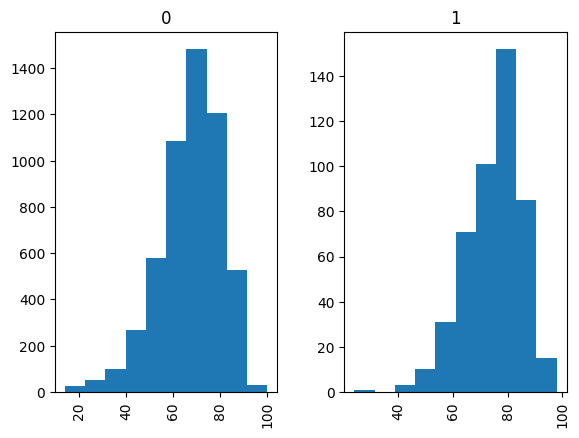

In [15]:
# histogram of the age of the patients in the dataset differentiating who has a cardiac cause of death and who has not
df['Age (1)'].hist(by=df['target'])

In [ ]:
# altri plot?

In [ ]:
# normalizzare i dati prima della classificazione

# Encoder building

In [ ]:
# todo

# Classical model

In [ ]:
# todo

# Comparison